### 特徴量選択：xboost

In [1]:
import gc
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import pandas_profiling as pp


warnings.filterwarnings('ignore')
%matplotlib inline


pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)

print(os.curdir)
print(os.listdir("input"))


.
['sample_submission.csv']


In [2]:
%%time
h5File = "temp_data/h5/prepared_data_with_last.h5";
key_train = 'prepared_01/train';
key_valid = 'prepared_01/valid';
key_test = 'prepared_01/test';

train = pd.read_hdf(h5File, key_train); gc.collect();
valid = pd.read_hdf(h5File, key_valid); gc.collect();
test = pd.read_hdf(h5File, key_test); gc.collect();


CPU times: user 20.1 s, sys: 23.3 s, total: 43.4 s
Wall time: 2min 16s


75

In [3]:
train

,count,S_2_days,P_2_min,P_2_max,P_2_avg,D_39_min,D_39_max,D_39_avg,B_1_min,B_1_max,B_1_avg,B_2_min,B_2_max,B_2_avg,R_1_min,R_1_max,R_1_avg,S_3_min,S_3_max,S_3_avg,D_41_min,D_41_max,D_41_avg,B_3_min,B_3_max,B_3_avg,D_42_min,D_42_max,D_42_avg,D_43_min,D_43_max,D_43_avg,D_44_min,D_44_max,D_44_avg,B_4_min,B_4_max,B_4_avg,D_45_min,D_45_max,D_45_avg,B_5_min,B_5_max,B_5_avg,R_2_min,R_2_max,R_2_avg,D_46_min,D_46_max,D_46_avg,D_47_min,D_47_max,D_47_avg,D_48_min,D_48_max,D_48_avg,D_49_min,D_49_max,D_49_avg,B_6_min,B_6_max,B_6_avg,B_7_min,B_7_max,B_7_avg,B_8_min,B_8_max,B_8_avg,D_50_min,D_50_max,D_50_avg,D_51_min,D_51_max,D_51_avg,B_9_min,B_9_max,B_9_avg,R_3_min,R_3_max,R_3_avg,D_52_min,D_52_max,D_52_avg,P_3_min,P_3_max,P_3_avg,B_10_min,B_10_max,B_10_avg,D_53_min,D_53_max,D_53_avg,S_5_min,S_5_max,S_5_avg,B_11_min,B_11_max,B_11_avg,S_6_min,S_6_max,S_6_avg,D_54_min,D_54_max,D_54_avg,R_4_min,R_4_max,R_4_avg,S_7_min,S_7_max,S_7_avg,B_12_min,B_12_max,B_12_avg,S_8_min,S_8_max,S_8_avg,D_55_min,D_55_max,D_55_avg,D_56_min,D_56_max,D_56_avg,B_13_min,B_13_max,B_13_avg,R_5_min,R_5_max,R_5_avg,D_58_min,D_58_max,D_58_avg,S_9_min,S_9_max,S_9_avg,B_14_min,B_14_max,B_14_avg,D_59_min,D_59_max,D_59_avg,D_60_min,D_60_max,D_60_avg,D_61_min,D_61_max,D_61_avg,B_15_min,B_15_max,B_15_avg,S_11_min,S_11_max,S_11_avg,D_62_min,D_62_max,D_62_avg,D_63_cnt_null,D_63_cnt_CL,D_63_cnt_CO,D_63_cnt_CR,D_63_cnt_XL,D_63_cnt_XM,D_63_cnt_XZ,D_64_cnt_null,D_64_cnt_m1,D_64_cnt_O,D_64_cnt_R,D_64_cnt_U,D_65_min,D_65_max,D_65_avg,B_16_min,B_16_max,B_16_avg,B_17_min,B_17_max,B_17_avg,B_18_min,B_18_max,B_18_avg,B_19_min,B_19_max,B_19_avg,D_66_cnt_null,D_66_cnt_0,D_66_cnt_1,B_20_min,B_20_max,B_20_avg,D_68_cnt_null,D_68_cnt_0,D_68_cnt_1,D_68_cnt_2,D_68_cnt_3,D_68_cnt_4,D_68_cnt_5,D_68_cnt_6,S_12_min,S_12_max,S_12_avg,R_6_min,R_6_max,R_6_avg,S_13_min,S_13_max,S_13_avg,B_21_min,B_21_max,B_21_avg,D_69_min,D_69_max,D_69_avg,B_22_min,B_22_max,B_22_avg,D_70_min,D_70_max,D_70_avg,D_71_min,D_71_max,D_71_avg,D_72_min,D_72_max,D_72_avg,S_15_min,S_15_max,S_15_avg,B_23_min,B_23_max,B_23_avg,D_73_min,D_73_max,D_73_avg,P_4_min,P_4_max,P_4_avg,D_74_min,D_74_max,D_74_avg,D_75_min,D_75_max,D_75_avg,D_76_min,D_76_max,D_76_avg,B_24_min,B_24_max,B_24_avg,R_7_min,R_7_max,R_7_avg,...,D_76_ldiff,B_24_last,B_24_ldiff,R_7_last,R_7_ldiff,D_77_last,D_77_ldiff,B_25_last,B_25_ldiff,B_26_last,B_26_ldiff,D_78_last,D_78_ldiff,D_79_last,D_79_ldiff,R_8_last,R_8_ldiff,R_9_last,R_9_ldiff,S_16_last,S_16_ldiff,D_80_last,D_80_ldiff,R_10_last,R_10_ldiff,R_11_last,R_11_ldiff,B_27_last,B_27_ldiff,D_81_last,D_81_ldiff,D_82_last,D_82_ldiff,S_17_last,S_17_ldiff,R_12_last,R_12_ldiff,B_28_last,B_28_ldiff,R_13_last,R_13_ldiff,D_83_last,D_83_ldiff,R_14_last,R_14_ldiff,R_15_last,R_15_ldiff,D_84_last,D_84_ldiff,R_16_last,R_16_ldiff,B_29_last,B_29_ldiff,B_30_last_null,B_30_last_0,B_30_last_1,B_30_last_2,B_30_last_3,S_18_last,S_18_ldiff,D_86_last,D_86_ldiff,D_87_last,D_87_ldiff,R_17_last,R_17_ldiff,R_18_last,R_18_ldiff,D_88_last,D_88_ldiff,B_31_last,B_31_ldiff,S_19_last,S_19_ldiff,R_19_last,R_19_ldiff,B_32_last,B_32_ldiff,S_20_last,S_20_ldiff,R_20_last,R_20_ldiff,R_21_last,R_21_ldiff,B_33_last,B_33_ldiff,D_89_last,D_89_ldiff,R_22_last,R_22_ldiff,R_23_last,R_23_ldiff,D_91_last,D_91_ldiff,D_92_last,D_92_ldiff,D_93_last,D_93_ldiff,D_94_last,D_94_ldiff,R_24_last,R_24_ldiff,R_25_last,R_25_ldiff,D_96_last,D_96_ldiff,S_22_last,S_22_ldiff,S_23_last,S_23_ldiff,S_24_last,S_24_ldiff,S_25_last,S_25_ldiff,S_26_last,S_26_ldiff,D_102_last,D_102_ldiff,D_103_last,D_103_ldiff,D_104_last,D_104_ldiff,D_105_last,D_105_ldiff,D_106_last,D_106_ldiff,D_107_last,D_107_ldiff,B_36_last,B_36_ldiff,B_37_last,B_37_ldiff,R_26_last,R_26_ldiff,R_27_last,R_27_ldiff,B_38_last_null,B_38_last_0,B_38_last_1,B_38_last_2,B_38_last_3,B_38_last_4,B_38_last_5,B_38_last_6,B_38_last_7,D_108_last,D_108_ldiff,D_109_last,D_109_ldiff,D_110_last,D_110_ldiff,D_111_last,D_111_ldiff,B_39_last,B_39_ldiff,D_112_last,D_112_ldiff,B_40_last,B_40_ldiff,S_27_last,S_27_ldiff,D_113_last,D_113_ldiff,D

In [4]:
valid

customer_ID
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a    0.0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5    0.0
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1    0.0
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc    0.0
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed    0.0
                                                                   ... 
e0dc8401f13e88ae5fadf2a6cd22ec8f2162a75964a00492ad406dfd437e716f    1.0
e0dcb868e734d5abe60f6a0d9107989aa0cef45c7da5f18642dee0b455c6c311    1.0
e0dcc67c6a5854ab27ac3b799141c2a5c9831471b93a96f1ee62c3e556133956    0.0
e0dd131940680fb03f52d808f3c1308abf4b057188fc0540614d2a543ab8a1ea    0.0
e0dd17ec1fae28e858808935b974ce142d53238d657018a1a2f129335e62d388    1.0
Name: target, Length: 458913, dtype: float64

In [5]:
test

,count,S_2_days,P_2_min,P_2_max,P_2_avg,D_39_min,D_39_max,D_39_avg,B_1_min,B_1_max,B_1_avg,B_2_min,B_2_max,B_2_avg,R_1_min,R_1_max,R_1_avg,S_3_min,S_3_max,S_3_avg,D_41_min,D_41_max,D_41_avg,B_3_min,B_3_max,B_3_avg,D_42_min,D_42_max,D_42_avg,D_43_min,D_43_max,D_43_avg,D_44_min,D_44_max,D_44_avg,B_4_min,B_4_max,B_4_avg,D_45_min,D_45_max,D_45_avg,B_5_min,B_5_max,B_5_avg,R_2_min,R_2_max,R_2_avg,D_46_min,D_46_max,D_46_avg,D_47_min,D_47_max,D_47_avg,D_48_min,D_48_max,D_48_avg,D_49_min,D_49_max,D_49_avg,B_6_min,B_6_max,B_6_avg,B_7_min,B_7_max,B_7_avg,B_8_min,B_8_max,B_8_avg,D_50_min,D_50_max,D_50_avg,D_51_min,D_51_max,D_51_avg,B_9_min,B_9_max,B_9_avg,R_3_min,R_3_max,R_3_avg,D_52_min,D_52_max,D_52_avg,P_3_min,P_3_max,P_3_avg,B_10_min,B_10_max,B_10_avg,D_53_min,D_53_max,D_53_avg,S_5_min,S_5_max,S_5_avg,B_11_min,B_11_max,B_11_avg,S_6_min,S_6_max,S_6_avg,D_54_min,D_54_max,D_54_avg,R_4_min,R_4_max,R_4_avg,S_7_min,S_7_max,S_7_avg,B_12_min,B_12_max,B_12_avg,S_8_min,S_8_max,S_8_avg,D_55_min,D_55_max,D_55_avg,D_56_min,D_56_max,D_56_avg,B_13_min,B_13_max,B_13_avg,R_5_min,R_5_max,R_5_avg,D_58_min,D_58_max,D_58_avg,S_9_min,S_9_max,S_9_avg,B_14_min,B_14_max,B_14_avg,D_59_min,D_59_max,D_59_avg,D_60_min,D_60_max,D_60_avg,D_61_min,D_61_max,D_61_avg,B_15_min,B_15_max,B_15_avg,S_11_min,S_11_max,S_11_avg,D_62_min,D_62_max,D_62_avg,D_63_cnt_null,D_63_cnt_CL,D_63_cnt_CO,D_63_cnt_CR,D_63_cnt_XL,D_63_cnt_XM,D_63_cnt_XZ,D_64_cnt_null,D_64_cnt_m1,D_64_cnt_O,D_64_cnt_R,D_64_cnt_U,D_65_min,D_65_max,D_65_avg,B_16_min,B_16_max,B_16_avg,B_17_min,B_17_max,B_17_avg,B_18_min,B_18_max,B_18_avg,B_19_min,B_19_max,B_19_avg,D_66_cnt_null,D_66_cnt_0,D_66_cnt_1,B_20_min,B_20_max,B_20_avg,D_68_cnt_null,D_68_cnt_0,D_68_cnt_1,D_68_cnt_2,D_68_cnt_3,D_68_cnt_4,D_68_cnt_5,D_68_cnt_6,S_12_min,S_12_max,S_12_avg,R_6_min,R_6_max,R_6_avg,S_13_min,S_13_max,S_13_avg,B_21_min,B_21_max,B_21_avg,D_69_min,D_69_max,D_69_avg,B_22_min,B_22_max,B_22_avg,D_70_min,D_70_max,D_70_avg,D_71_min,D_71_max,D_71_avg,D_72_min,D_72_max,D_72_avg,S_15_min,S_15_max,S_15_avg,B_23_min,B_23_max,B_23_avg,D_73_min,D_73_max,D_73_avg,P_4_min,P_4_max,P_4_avg,D_74_min,D_74_max,D_74_avg,D_75_min,D_75_max,D_75_avg,D_76_min,D_76_max,D_76_avg,B_24_min,B_24_max,B_24_avg,R_7_min,R_7_max,R_7_avg,...,D_76_ldiff,B_24_last,B_24_ldiff,R_7_last,R_7_ldiff,D_77_last,D_77_ldiff,B_25_last,B_25_ldiff,B_26_last,B_26_ldiff,D_78_last,D_78_ldiff,D_79_last,D_79_ldiff,R_8_last,R_8_ldiff,R_9_last,R_9_ldiff,S_16_last,S_16_ldiff,D_80_last,D_80_ldiff,R_10_last,R_10_ldiff,R_11_last,R_11_ldiff,B_27_last,B_27_ldiff,D_81_last,D_81_ldiff,D_82_last,D_82_ldiff,S_17_last,S_17_ldiff,R_12_last,R_12_ldiff,B_28_last,B_28_ldiff,R_13_last,R_13_ldiff,D_83_last,D_83_ldiff,R_14_last,R_14_ldiff,R_15_last,R_15_ldiff,D_84_last,D_84_ldiff,R_16_last,R_16_ldiff,B_29_last,B_29_ldiff,B_30_last_null,B_30_last_0,B_30_last_1,B_30_last_2,B_30_last_3,S_18_last,S_18_ldiff,D_86_last,D_86_ldiff,D_87_last,D_87_ldiff,R_17_last,R_17_ldiff,R_18_last,R_18_ldiff,D_88_last,D_88_ldiff,B_31_last,B_31_ldiff,S_19_last,S_19_ldiff,R_19_last,R_19_ldiff,B_32_last,B_32_ldiff,S_20_last,S_20_ldiff,R_20_last,R_20_ldiff,R_21_last,R_21_ldiff,B_33_last,B_33_ldiff,D_89_last,D_89_ldiff,R_22_last,R_22_ldiff,R_23_last,R_23_ldiff,D_91_last,D_91_ldiff,D_92_last,D_92_ldiff,D_93_last,D_93_ldiff,D_94_last,D_94_ldiff,R_24_last,R_24_ldiff,R_25_last,R_25_ldiff,D_96_last,D_96_ldiff,S_22_last,S_22_ldiff,S_23_last,S_23_ldiff,S_24_last,S_24_ldiff,S_25_last,S_25_ldiff,S_26_last,S_26_ldiff,D_102_last,D_102_ldiff,D_103_last,D_103_ldiff,D_104_last,D_104_ldiff,D_105_last,D_105_ldiff,D_106_last,D_106_ldiff,D_107_last,D_107_ldiff,B_36_last,B_36_ldiff,B_37_last,B_37_ldiff,R_26_last,R_26_ldiff,R_27_last,R_27_ldiff,B_38_last_null,B_38_last_0,B_38_last_1,B_38_last_2,B_38_last_3,B_38_last_4,B_38_last_5,B_38_last_6,B_38_last_7,D_108_last,D_108_ldiff,D_109_last,D_109_ldiff,D_110_last,D_110_ldiff,D_111_last,D_111_ldiff,B_39_last,B_39_ldiff,D_112_last,D_112_ldiff,B_40_last,B_40_ldiff,S_27_last,S_27_ldiff,D_113_last,D_113_ldiff,D

In [6]:
X_train = train
y_train = valid
X_test = test

In [7]:
# X_train = train[:1000]
# y_train = valid[:1000]
# X_test = test[:1000]

In [8]:
X_train.shape

(458913, 1009)

In [9]:
y_train.shape

(458913,)

In [10]:
X_test.shape

(924621, 1009)

In [11]:
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0, stratify=y_train)
print(X_tr.head())
print(X_val.head())
print(y_tr.head())
print(y_val.head())


                                                    count  S_2_days   P_2_min  \
customer_ID                                                                     
6c0333b9b0fac08bbdafa1bab52c58a83885b5f7d08c7be...      4        73  0.445362   
2eeb8d54bd8fcecd3010654c7a96cc50a7ee69d3cec12b4...     13       363  0.704863   
b826376f20e8dae64ff9cc1b0ef150cf35f8aa8a30d24a2...     13       390  0.886276   
eb1614afb4edc48fcb9fa2f0cef68aa549c9e1fbf95b609...     13       341  0.878629   
7e0698b325334ed06d387cb106873a680da090c67cf5eb2...     13       383  0.829303   

                                                     P_2_max   P_2_avg  \
customer_ID                                                              
6c0333b9b0fac08bbdafa1bab52c58a83885b5f7d08c7be...  0.555357  0.499311   
2eeb8d54bd8fcecd3010654c7a96cc50a7ee69d3cec12b4...  0.840250  0.774400   
b826376f20e8dae64ff9cc1b0ef150cf35f8aa8a30d24a2...  0.929666  0.906197   
eb1614afb4edc48fcb9fa2f0cef68aa549c9e1fbf95b609...  0.936069  

In [15]:
%%time

# 学習
from xgboost import XGBClassifier

model = XGBClassifier(
    learning_rate=0.1,
    random_state=55,
    early_stopping_rounds=10,
    n_estimators=200,
    # booster='dart',
    max_depth=4,
    min_child_weight=3.2480334760003626,
    gamma=4.148487315201553,
    reg_alpha=0.22188024306269027,
    reg_lambda=1.4156970268030378,
)

eval_set = [(X_val, y_val)]
model.fit(X_tr, y_tr, eval_set=eval_set, verbose=True)


[0]	validation_0-logloss:0.63257
[1]	validation_0-logloss:0.58293
[2]	validation_0-logloss:0.54132
[3]	validation_0-logloss:0.50625
[4]	validation_0-logloss:0.47601
[5]	validation_0-logloss:0.45032
[6]	validation_0-logloss:0.42766
[7]	validation_0-logloss:0.40801
[8]	validation_0-logloss:0.39092
[9]	validation_0-logloss:0.37602
[10]	validation_0-logloss:0.36265
[11]	validation_0-logloss:0.35064
[12]	validation_0-logloss:0.34022
[13]	validation_0-logloss:0.33088
[14]	validation_0-logloss:0.32250
[15]	validation_0-logloss:0.31467
[16]	validation_0-logloss:0.30783
[17]	validation_0-logloss:0.30189
[18]	validation_0-logloss:0.29638
[19]	validation_0-logloss:0.29154
[20]	validation_0-logloss:0.28716
[21]	validation_0-logloss:0.28293
[22]	validation_0-logloss:0.27929
[23]	validation_0-logloss:0.27600
[24]	validation_0-logloss:0.27279
[25]	validation_0-logloss:0.26998
[26]	validation_0-logloss:0.26752
[27]	validation_0-logloss:0.26510
[28]	validation_0-logloss:0.26294
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=10, enable_categorical=False,
              eval_metric=None, gamma=4.148487315201553, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=4, max_leaves=0,
              min_child_weight=3.2480334760003626, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=55,
              reg_alpha=0.22188024306269027, reg_lambda=1.4156970268030378, ...)

In [16]:
# テストデータで予測
y_pred = model.predict_proba(X_val)
y_pred


array([[9.9947369e-01, 5.2628142e-04],
       [9.9917263e-01, 8.2734722e-04],
       [9.8790419e-01, 1.2095798e-02],
       ...,
       [9.7763681e-01, 2.2363186e-02],
       [9.9535698e-01, 4.6430291e-03],
       [1.1774188e-01, 8.8225812e-01]], dtype=float32)

In [30]:
from sklearn.metrics import accuracy_score
y_pred = y_pred[:, 1]
y_pred_int = (y_pred > 0.5).astype(int)
print('accuracy_score:', accuracy_score(y_val, y_pred_int))

accuracy_score: 0.9007583131164926


In [31]:
y_val

customer_ID
157a775817bb0c5246701edb66ca159f71a01a5ddf5e187413f5b80efd910655    0.0
a931e8722753838feb397928c9fe9dd334094e950c47aaf96d1df067c46703fb    0.0
df719096e4d39e44628d08237066b52496fb231e5bd968909929d7465a97557e    0.0
7c078641db57d114f67902ac0ea50df90bf8d244fec06f2be395a91c11b0a8fc    1.0
cb755aa76414497af98eee2667ae17c6cd8f4e031624bbe79b608a31b2e67f94    0.0
                                                                   ... 
c13b595abfc962701dd589a1aa1629a4de72002100e12716b8bb41d335340811    0.0
e6f0255741c5aebfa581d4970e37e20ba814b416e7b40f180ff0ee881f95dbff    0.0
a97a5c52ed26b4a7ce1c33cd60d5ef8b84b1253ad5f87a43d1d331febf0c48b1    0.0
60ea77a6fa811f0b0e3dbffe67f749035eaaa1b5e8333582468e0de566ef2c1d    0.0
9497be41e36d1ca0b9ab6fe903b7be83bdfeb663a3a180e7e3330ca01f90e7a9    1.0
Name: target, Length: 137674, dtype: float64

In [35]:
# feature importanceを表示
importance_values = model.feature_importances_   
importance_values



array([0.        , 0.00032719, 0.00079298, ..., 0.        , 0.        ,
       0.00045796], dtype=float32)

In [34]:
# feature importanceを表示
importance = X_train.T.iloc[:,[0]]
importance['importance'] = importance_values
importance = importance.drop(columns=importance.columns[0])
importance = importance.sort_values('importance', ascending=False)
importance = importance.reset_index()
display(importance[:1000])


customer_ID,index,importance
0,P_2_last,0.087181
1,D_48_last,0.059328
2,B_9_last,0.051514
3,B_2_last,0.041016
4,B_1_last,0.038397
5,D_44_last,0.034492
6,R_1_avg,0.021556
7,D_44_max,0.020854
8,B_7_last,0.019829
9,D_51_last,0.019169


<AxesSubplot:>

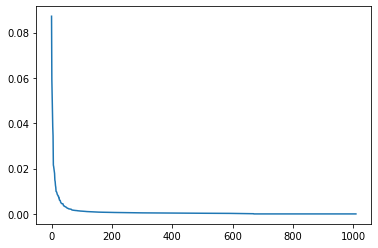

In [36]:
importance['importance'].plot()


In [37]:
path = f'./output/feature-select/importance-xboost.csv'
importance.to_csv(path)
